## CustomSource

Zdroj [CustomSource](https://meep.readthedocs.io/en/latest/Python_User_Interface/#customsource) umožňuje definíciu zdroja pomocou externej uživateľom definovanej funkcie.


-----------
Initializing structure...
run 0 finished at t = 50.0 (400 timesteps)


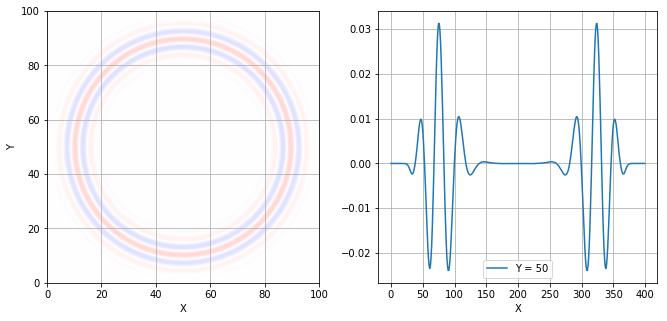

In [10]:
%reset -f 
%matplotlib inline
import numpy as np
import meep as mp 
import matplotlib.pyplot as plt
from utils.utils import src_plot

dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

def pulse(t):
    return np.sin(t)*np.exp(-(t-10)**2 / 30.0)

sources = [mp.Source(mp.CustomSource(src_func=pulse), 
                     component = mp.Ez,
                     center = mp.Vector3(0,0,0))]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=4)

sim.run(until=50)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)
src_plot(dx, dy, data.transpose())